In [ ]:
using PyPlot

## Backtracked Linesearch

Recall, the basic outline of a descent method for solving

$$
    \min_x f(x) \quad \text{ where } f:R^n \to R \text{ is smooth}.
$$

Assume that at the $k$th step we have the iterate $x_k$ and found a descent direction $d$. Our goal is then to find a step size $t$ that solves

$$
    \min_{t>0} \phi(t)\quad \text{ where } \phi : R \to R \text{ with } \phi(t) = f(x_k + t d)
$$

This problem is a univariate optimization problem. Thus, the first-order necessary condition is only one (potentially complicated) equation. If we cannot solve this equation, we can easily find an approximate solution by plotting $\phi$ for many $t$'s. However, this might be very costly in practise, when $n$ is large or $f$ is complicated. 

To overcome these drawbacks, this notebook illustrates the idea of backtracked line search.

## Example: Rosenbrock's function

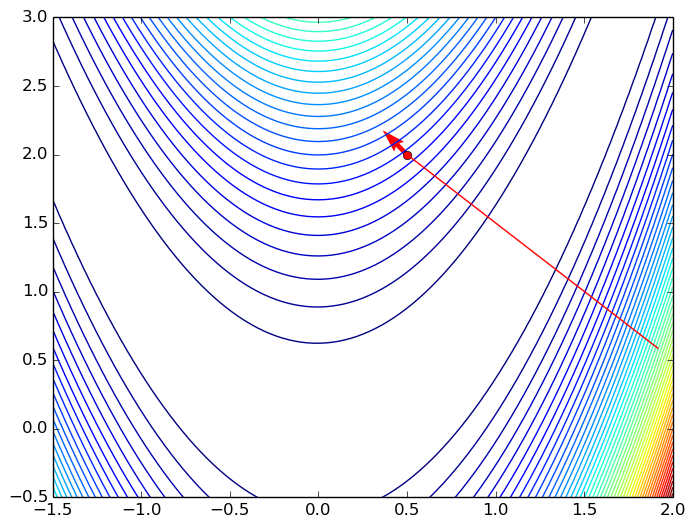

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1ffe076850>

In [8]:
f(x) = (1-x[1])^2 + 100*(x[2]-x[1]^2)^2
df(x) = [-2*(1-x[1])-400*(x[2]-x[1]^2)*x[1]; 200*(x[2]-x[1]^2)]
x0  = [0.5;2]
df0 = df(x0)


# plot function and starting guess
x1 = linspace(-1.5,2,101)
x2 = linspace(-0.5,3,101)
fx = [f([x1[k],x2[j]]) for k=1:length(x1), j=1:length(x2)]
contour(x1,x2,fx',50,hold=true)
        return
plot(x0[1],x0[2],"or")
quiver(x0[1],x0[2],df0[1],df0[2],color="r",hold=true)

return
# add linesearch area
d = -2*df0/norm(df0)
t = linspace(0,1,101)
xs1 = x0[1]+t*d[1]
xs2 = x0[2]+t*d[2]
plot(xs1,xs2,"-r")

## The sufficient decrease condition

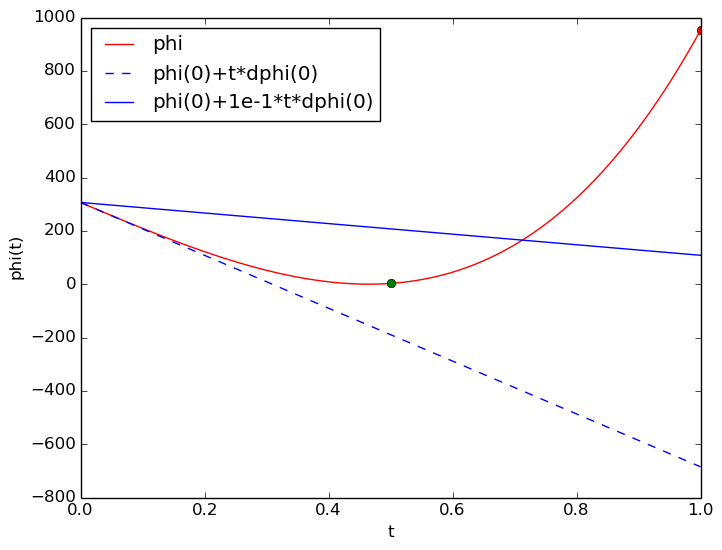

In [10]:
tt= t
phi(t) = f(x0+t*d)
dphi(t) = dot(d,df(x0+t*d))

phit = [f([xs1[k];xs2[k]]) for k=1:length(tt)]
plot(t,phit,"-r",hold=true)
ylabel("phi(t)")
xlabel("t")
return
# add linearization of phi
g(t) = phi(0) + t*dphi(0)
plot(tt,g(tt),"--b")

# add backtracking function
l(t) = phi(0) + 2e-1*t*dphi(0)
plot(tt,l(tt),"-b")
legend({"phi","phi(0)+t*dphi(0)","phi(0)+1e-1*t*dphi(0)"},loc=2)

# Backtracking
plot(1,phi(1),"or")
plot(1/2,phi(1./2),"og");

The above plot visualizes the sufficient decrease condition. All step sizes $t$ where the red curve is below the solid blue curve are acceptable. The blue curve is obtained by damping the linearization of $\phi$ at $0$.

The idea of backtracking is to start with $t=1$ and accept the step if $\phi(1) < l(1)$ (red dot). If not, we try $t=1/2$ which in this case gets accepted (green dot).

The condition 
$$
    f(x_k + t d) < f(x_k) + \alpha \nabla f(x_k)^T d
$$

is also called Armijo condition. You can find an implementation of this in the function ``armijo`` in the file ``optiFuncs.jl``.